In [84]:
import pandas as pd
import numpy as np
from __future__ import print_function

# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# Read in the crime data from the Lab 1 CSV file

dc = pd.read_csv('/Users/murali/SMU/Minilab1/MSDS7331_MiniLab_DC/data/DC_Crime_2015_Lab1.csv')
df_classify = dc.copy()

In [85]:
for attrib in ('OFFENSE', 'METHOD', 'DISTRICT', 'REPORT_DAT', 'CCN', 'START_DATE', 'END_DATE', 
               'SHIFT', 'PSA', 'TIME_TO_REPORT', 'XBLOCK', 'YBLOCK','WARD','Latitude','Longitude'):
    if attrib in df_classify:
        del df_classify[attrib]

In [86]:
df_classify.head()

,ANC,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,VOTING_PRECINCT,PSA_ID,DistrictID,SHIFT_Code,OFFENSE_Code,METHOD_Code,CRIME_TYPE,AGE
0,12,3,4300,22,305,3,1,1,1,2,2678580
1,14,2,2701,40,408,4,1,2,1,2,176880
2,11,2,3000,39,302,3,2,1,1,2,600
3,12,3,3400,37,306,3,1,1,1,2,1449000
4,11,2,3000,39,302,3,1,2,1,2,71940


In [89]:
from sklearn import datasets, linear_model
#df_classify.info()
#dc.info()
#dc.head()
X_multi = df_classify.drop('CRIME_TYPE',1)
Y_Target = df_classify.CRIME_TYPE

 
legr = linear_model.LinearRegression()
legr.fit(X_multi, Y_Target)

#SHIFT_CODE
#CRIME_TYPE
#df_x = dc['PSA']
#df_y = dc['CRIME_TYPE']

#plt.scatter(df_y, df_x,  color='black')



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
from pandas import Series,DataFrame
print(' The estimated intercept coefficient is %.2f ' %legr.intercept_)

print(' The number of coefficients used was %d ' % len(legr.coef_))

print (legr.coef_)

 

 The estimated intercept coefficient is 2.64 
 The number of coefficients used was 10 
[ -9.07263703e-05   6.40075086e-04   8.83636356e-08  -1.12209858e-04
  -1.05314405e-03   1.04646334e-01  -4.70653267e-02  -9.42068767e-02
  -4.32773197e-01   5.66267116e-11]


,0
0,REPORT_DAT
1,SHIFT
2,OFFENSE
3,METHOD
4,DISTRICT
5,PSA
6,WARD
7,ANC
8,NEIGHBORHOOD_CLUSTER
9,CENSUS_TRACT


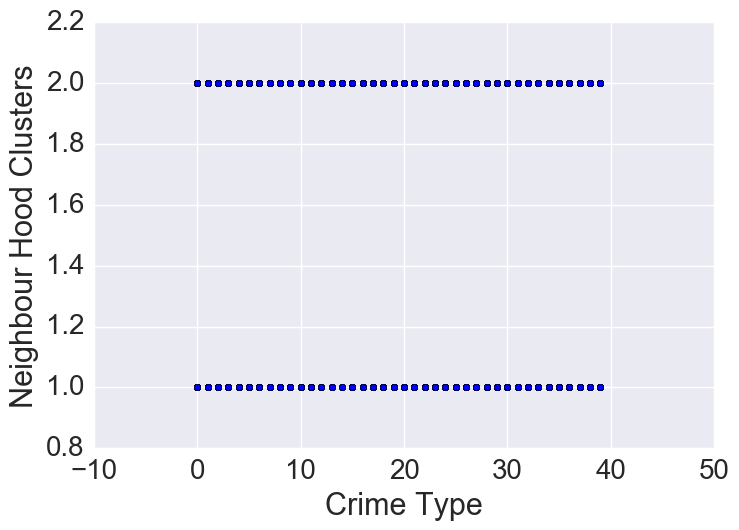

In [93]:
# Set a DataFrame from the Features

df_new = df_classify.copy()

del df_new['CRIME_TYPE']

coeff_df = DataFrame(df_new.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(legr.coef_)

# Show
coeff_df

plt.scatter(df_classify['NEIGHBORHOOD_CLUSTER'],df_classify['CRIME_TYPE'])
''
#label
plt.ylabel('Neighbour Hood Clusters')
plt.xlabel('Crime Type')

In [114]:
# Grab the output and set as X and Y test and train data sets!
import sklearn.cross_validation
df_x = df_classify['NEIGHBORHOOD_CLUSTER']
df_y = df_classify['CRIME_TYPE']
df_x = np.vstack(df_classify['NEIGHBORHOOD_CLUSTER'])
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(df_x,df_y)

# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(27366, 1) (9123, 1) (27366,) (9123,)


Coefficients: 
 [-0.00528942]
Mean squared error: 0.14
Variance score: 0.03


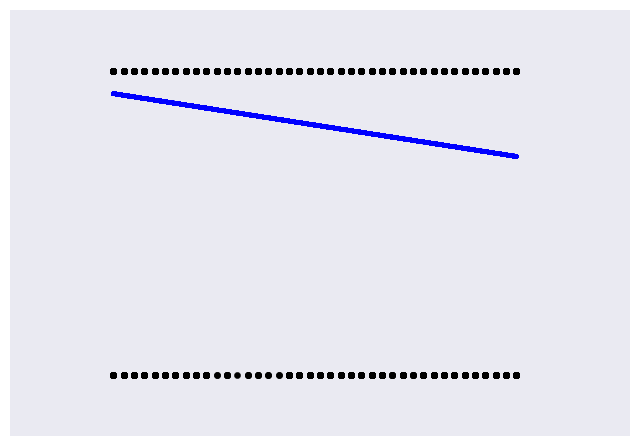

In [122]:
from sklearn import metrics as mt
 
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
     % np.mean((regr.predict(X_test) - Y_test) ** 2))
#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

y_hat = regr.predict(X_test) # get test set precitions
#acc = mt.accuracy_score(Y_test,y_hat)
#conf = mt.confusion_matrix(Y_test,y_hat)
